In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
df = pd.read_csv("Groceries_dataset.csv")
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


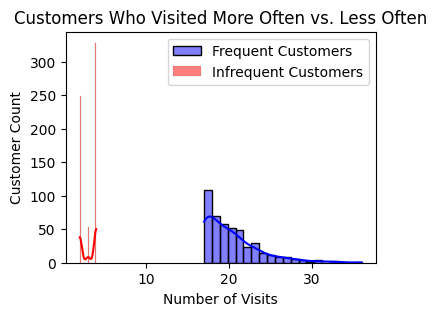

In [14]:

df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
customer_visits = df["Member_number"].value_counts()
high_threshold = customer_visits.quantile(0.90)
low_threshold = customer_visits.quantile(0.10)
frequent_customers = customer_visits[customer_visits >= high_threshold]
infrequent_customers = customer_visits[customer_visits <= low_threshold]
plt.figure(figsize=(4, 3))
sns.histplot(frequent_customers, bins=20, color="blue", label="Frequent Customers", kde=True)
sns.histplot(infrequent_customers, bins=20, color="red", label="Infrequent Customers", kde=True)
plt.xlabel("Number of Visits")
plt.ylabel("Customer Count")
plt.title("Customers Who Visited More Often vs. Less Often")
plt.legend()
plt.show()


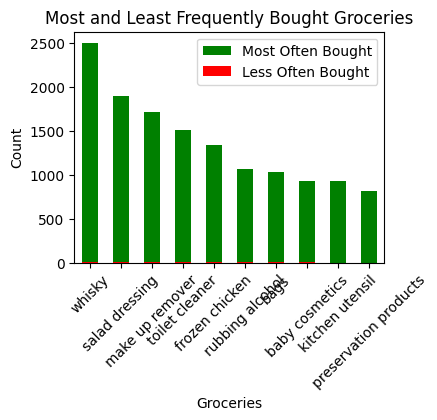

In [15]:
grocery_counts = df["itemDescription"].value_counts()

plt.figure(figsize=(4, 3))
grocery_counts.head(10).plot(kind='bar', color='green', label='Most Often Bought')
grocery_counts.tail(10).plot(kind='bar', color='red', label='Less Often Bought')
plt.xlabel("Groceries")
plt.ylabel("Count")
plt.title("Most and Least Frequently Bought Groceries")
plt.legend()
plt.xticks(rotation=45)
plt.show()

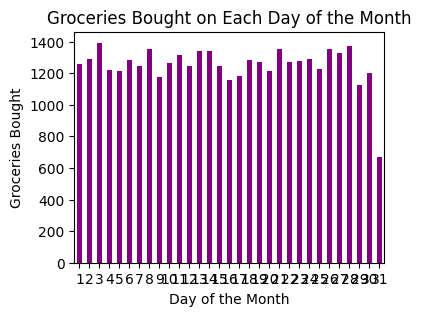

In [16]:
df["Day"] = df["Date"].dt.day
daily_counts = df.groupby("Day")["itemDescription"].count()
plt.figure(figsize=(4, 3))
daily_counts.plot(kind='bar', color='purple')
plt.xlabel("Day of the Month")
plt.ylabel("Groceries Bought")
plt.title("Groceries Bought on Each Day of the Month")
plt.xticks(rotation=0)
plt.show()

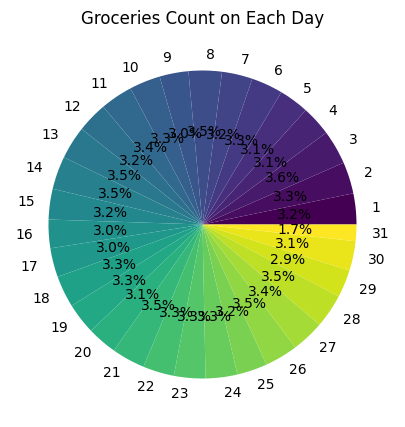

In [17]:
plt.figure(figsize=(6, 5))
daily_counts.plot(kind='pie', autopct='%1.1f%%', colormap='viridis')
plt.ylabel("")
plt.title("Groceries Count on Each Day")
plt.show()

In [18]:
basket = df.groupby(['Member_number', 'itemDescription'])['Date'].count().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
min_support = 0.01
min_confidence = 0.2
frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
rules = rules.sort_values(by='lift', ascending=False)
print("Frequent Itemsets:")
print(frequent_itemsets.head())
print("\nAssociation Rules:")
print(rules.head())


C:\Users\DELL\AppData\Local\Temp\ipykernel_12276\2941441963.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
    support                 itemsets
0  0.015393  (Instant food products)
1  0.078502               (UHT-milk)
2  0.031042          (baking powder)
3  0.119548                   (beef)
4  0.079785                (berries)

Association Rules:
                                  antecedents                  consequents  \
5820  (whole milk, other vegetables, sausage)         (rolls/buns, yogurt)   
5814   (other vegetables, rolls/buns, yogurt)        (whole milk, sausage)   
4902                           (curd, yogurt)        (whole milk, sausage)   
5818        (whole milk, sausage, rolls/buns)   (other vegetables, yogurt)   
5813         (whole milk, rolls/buns, yogurt)  (other vegetables, sausage)   

      antecedent support  consequent support   support  confidence      lift  \
5820            0.050282            0.111339  0.013597    0.270408  2.428689   
5814            0.052335            0.106978  0.013597    0.259804  2.428575   
4902            0.040277      